In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv("latestSwing.csv",header=None)
df.head(5)

,0,1,2,3,4,5,6
0,0,-1.163086,0.238281,-1.051758,4.814930,-15.695393,-6.593897
1,1249,-1.136719,0.265625,-1.041016,4.736102,-15.614434,-6.480981
2,2497,-1.118164,0.285156,-1.030273,4.659403,-15.507910,-6.359542
3,3746,-1.087891,0.293945,-1.024414,4.667925,-15.382210,-6.250887
4,4996,-0.972656,0.323242,-0.963867,4.727580,-15.226684,-6.165667


In [61]:
df_for_graph = df.iloc[:,1:7] 

In [62]:
df_for_graph.head(5)

,1,2,3,4,5,6
0,-1.163086,0.238281,-1.051758,4.814930,-15.695393,-6.593897
1,-1.136719,0.265625,-1.041016,4.736102,-15.614434,-6.480981
2,-1.118164,0.285156,-1.030273,4.659403,-15.507910,-6.359542
3,-1.087891,0.293945,-1.024414,4.667925,-15.382210,-6.250887
4,-0.972656,0.323242,-0.963867,4.727580,-15.226684,-6.165667


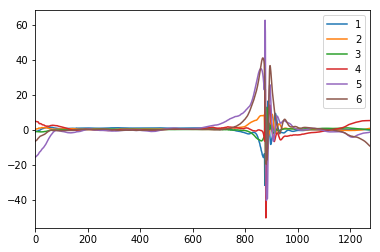

In [63]:
df_for_graph.plot()

In [70]:
df_for_graph1 = df.iloc[870:885,1:7] 

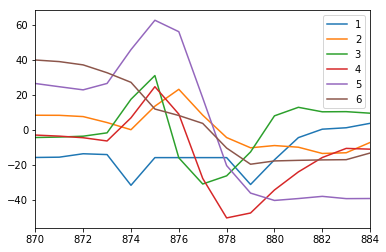

In [71]:
df_for_graph1.plot()

In [48]:
df[0].tolist

<bound method Series.tolist of 0             0
1          1249
2          2497
3          3746
4          4996
5          6243
6          7492
7          8741
8          9989
9         11238
10        12487
11        13735
12        14984
13        16235
14        17483
15        18730
16        19979
17        21229
18        22477
19        23725
20        24973
21        26222
22        27471
23        28720
24        29970
25        31217
26        32465
27        33716
28        34963
29        36212
         ...   
1246    1555855
1247    1557104
1248    1558354
1249    1559601
1250    1560850
1251    1562100
1252    1563347
1253    1564596
1254    1565844
1255    1567093
1256    1568342
1257    1569590
1258    1570839
1259    1572088
1260    1573336
1261    1574585
1262    1575834
1263    1577082
1264    1578333
1265    1579580
1266    1580828
1267    1582079
1268    1583326
1269    1584575
1270    1585825
1271    1587072
1272    1588321
1273    1589571
1274    1590818
1275    1

In [50]:
(df[0].values).tolist()

[0,
 1249,
 2497,
 3746,
 4996,
 6243,
 7492,
 8741,
 9989,
 11238,
 12487,
 13735,
 14984,
 16235,
 17483,
 18730,
 19979,
 21229,
 22477,
 23725,
 24973,
 26222,
 27471,
 28720,
 29970,
 31217,
 32465,
 33716,
 34963,
 36212,
 37460,
 38709,
 39959,
 41206,
 42455,
 43704,
 44952,
 46201,
 47451,
 48698,
 49947,
 51196,
 52444,
 53693,
 54942,
 56190,
 57439,
 58688,
 59938,
 61185,
 62434,
 63682,
 64931,
 66183,
 67430,
 68677,
 69926,
 71176,
 72423,
 73673,
 74922,
 76169,
 77418,
 78667,
 79917,
 81164,
 82413,
 83661,
 84910,
 86159,
 87410,
 88656,
 89905,
 91153,
 92402,
 93651,
 94901,
 96148,
 97397,
 98646,
 99894,
 101143,
 102394,
 103640,
 104889,
 106138,
 107386,
 108635,
 109885,
 111132,
 112381,
 113630,
 114878,
 116127,
 117376,
 118624,
 119873,
 121122,
 122372,
 123619,
 124868,
 126118,
 127368,
 128614,
 129862,
 131112,
 132360,
 133611,
 134859,
 136106,
 137355,
 138603,
 139852,
 141102,
 142349,
 143598,
 144847,
 146095,
 147344,
 148593,
 149842,
 151

In [ ]:
class DKData(object):
    def __init__(self,data):
        self.timestamp = data

In [21]:
def searchContinuityAboveValue(data, indexBegin, indexEnd, threshold, winLength):
    count = 0
    flag = True
    # for i in range(indexBegin, indexEnd-winLength+2):
    for i in range(indexBegin, indexEnd +1):
        if data[i] > threshold:
            count += 1
            if (flag):
                first_index = i
                flag = False
        else:
            count = 0
            flag = True
        if count == winLength:
            return first_index
    return None        

In [28]:
def backSearchContinuityWithinRange(data, indexBegin, indexEnd, thresholdLo, thresholdHi, winLength):
    count = 0
    flag = True
    for i in range(indexBegin,indexEnd-1, -1):
        #print(i, (data[i] > thresholdLo) and (data[i] < thresholdHi))
        if (data[i] > thresholdLo) and (data[i] < thresholdHi) :
            count += 1
            if (flag):
                first_index = i
                flag = False
        else:
            count = 0
            flag = True
        if count == winLength:
            return first_index
    return None      

In [ ]:
def searchContinuityAboveValueTwoSignals(data1, data2, indexBegin, indexEnd, threshold1, threshold2, winLength):
    count = 0
    flag = True
    for i in range(indexBegin,indexEnd+1):
        if (data1[i] > threshold1) and (data2[i] > threshold2) :
            count += 1
            if (flag):
                first_index = i
                flag = False
        else:
            count = 0
            flag = True
        if count == winLength:
            return first_index
    return None      

In [39]:
def searchMultiContinuityWithinRange(data, indexBegin, indexEnd, thresholdLo, thresholdHi, winLength):
    count = 0
    flag = True
    ret = []
    # for i in range(indexBegin, indexEnd-winLength+2):
    for i in range(indexBegin, indexEnd +1):
        if (data[i] > thresholdLo) and (data[i] < thresholdHi) :
            count += 1
            if (flag):
                first_index = i
                flag = False
            else:
                last_index = i
        else:
            count = 0
            flag = True
        if count >= winLength:
            ret.append((last_index - winLength + 1, last_index))
    return ret    

In [23]:
print(searchContinuityAboveValue([0,1,2,3,4,5],2,5,3,2))
#def searchContinuityAboveValue(data, indexBegin, indexEnd5, threshold3, winLength2):


4


In [29]:
#def backSearchContinuityWithinRange(data, indexBegin, indexEnd, thresholdLo, thresholdHi, winLength):
print(backSearchContinuityWithinRange([0,1,2,3,4,5],5,2,3,6,2))

5 True
4 True
5


In [31]:
for i in range(5,1,-1):
    print(i)

5
4
3
2


In [44]:
print(searchMultiContinuityWithinRange([0,1,2,4,4,5,2,4,4],2,8,3,8,2))
#def searchMultiContinuityWithinRange(data, indexBegin, indexEnd, thresholdLo, thresholdHi, winLength):


[(3, 4), (4, 5), (7, 8)]
